# 5.2 (OLD DATA, PROBABLY OUTDATED)

In [34]:
import ugradio #if remote git clone this module
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from scipy import signal

In [35]:
df = pd.read_csv('data/test_data_012222')
x = np.arange(2048)

In [36]:
def volt_spec(fgen, sample):
    data = df['fgen_%s_sample_%s'%(fgen, sample)]
    fourier = ugradio.dft.dft(data)
    return fourier

def power_spec(fgen, sample): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(fgen, sample)
    return abs(volt[0]**2), abs(volt[1]**2) #returns power spectrum of specified frequencies

<IPython.core.display.Javascript object>


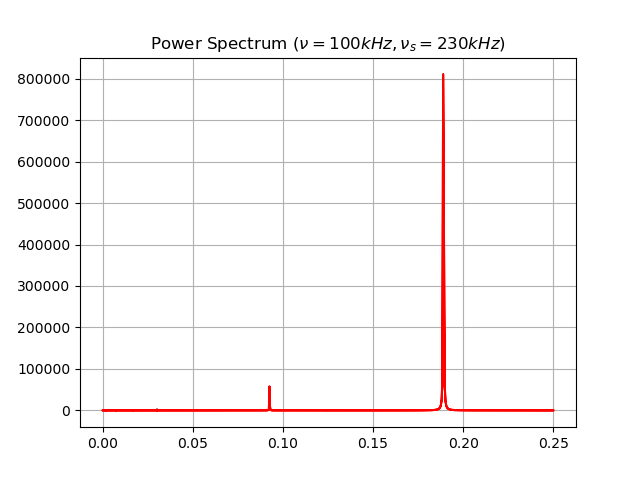

In [42]:
#nu = 100 kHz, nu_s = 230 kHz
power_100_230 = power_spec('100', '230')
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 230 kHz)$')
plt.plot(power_100_230[0], power_100_230[1].real, label = 'Real', color = 'r')
#plt.plot(power_100_230[0], power_100_230[1].imag, label = 'Imaginary')
plt.grid()

<IPython.core.display.Javascript object>


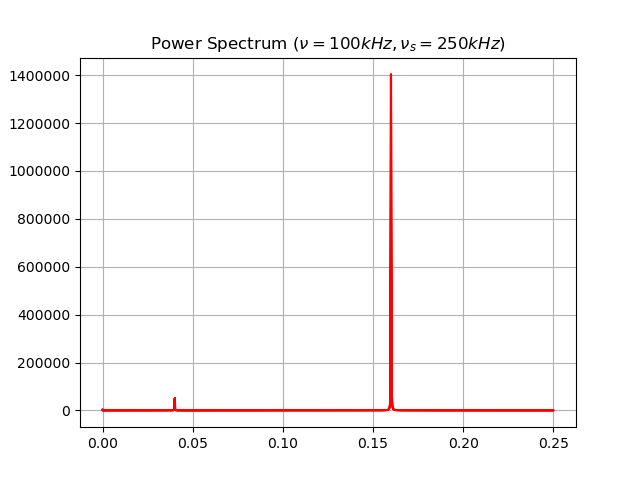

In [41]:
#nu = 100 kHz, nu_s = 250 kHz
power_100_250 = power_spec('100', '250')
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 250 kHz)$')
plt.plot(power_100_250[0], power_100_250[1].real, label = 'Real', color = 'r')
#plt.plot(power_100_250[0], power_100_250[1].imag, label = 'Imaginary')
plt.grid()

<IPython.core.display.Javascript object>


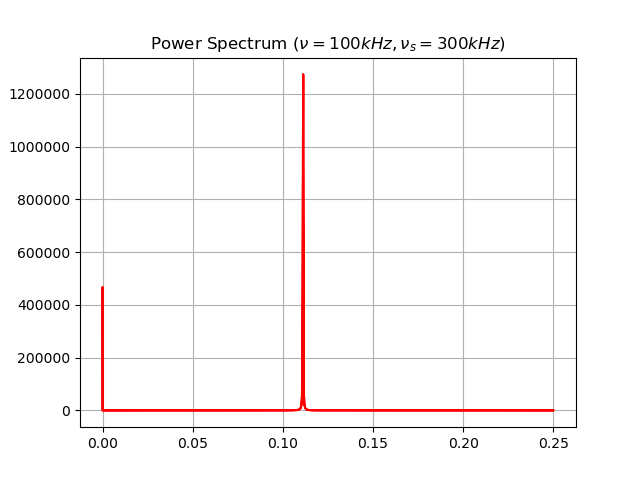

In [44]:
#nu = 100 kHz, nu_s = 300 kHz
power_100_300 = power_spec('100', '300')
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 300 kHz)$')
plt.plot(power_100_300[0], power_100_300[1].real, label = 'Real', color = 'r')
#plt.plot(power_100_300[0], power_100_300[1].imag, label = 'Imaginary')
plt.grid()

<IPython.core.display.Javascript object>


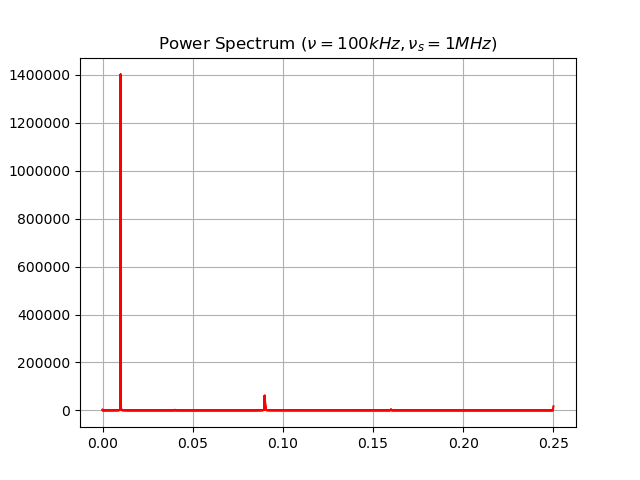

In [45]:
#nu = 100 kHz, nu_s = 1 MHz
power_100_1000 = power_spec('100', '1000')
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 1 MHz)$')
plt.plot(power_100_1000[0], power_100_1000[1].real, label = 'Real', color = 'r')
#plt.plot(power_100_1000[0], power_100_1000[1].imag, label = 'Imaginary')
plt.grid()

<IPython.core.display.Javascript object>


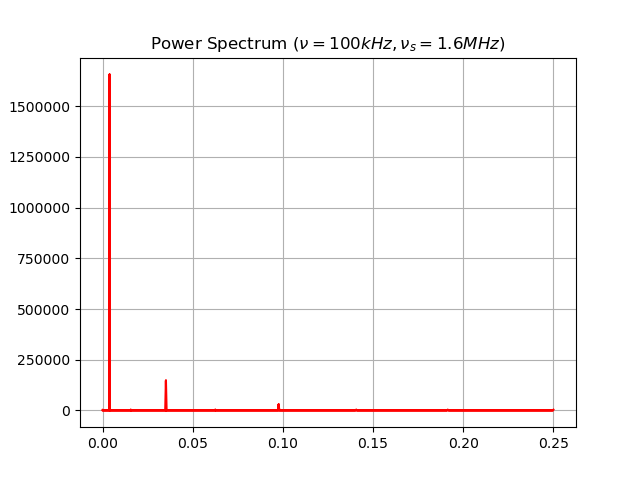

In [46]:
#nu = 100 kHz, nu_s = 1.6 MHz
power_100_1600 = power_spec('100', '1600')
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 1.6 MHz)$')
plt.plot(power_100_1600[0], power_100_1600[1].real, label = 'Real', color = 'r')
#plt.plot(power_100_1600[0], power_100_1600[1].imag, label = 'Imaginary')
plt.grid()

<IPython.core.display.Javascript object>


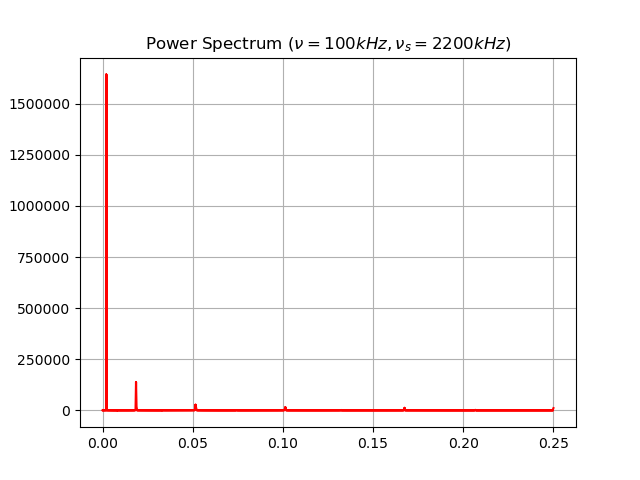

In [47]:
#nu = 100 kHz, nu_s = 2.2 MHz
power_100_2200 = power_spec('100', '2200')
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.plot(power_100_2200[0], power_100_2200[1].real, label = 'Real', color = 'r')
#plt.plot(power_100_2200[0], power_100_2200[1].imag, label = 'Imaginary')
plt.grid()

# 5.2 (NEW DATA) and 5.3

In [10]:
test_data = pd.read_csv('data/data_012822')
#experimentation cell

titles = test_data.columns[1:7] #datatype is a pandas index with string values; can pull strings by indexing
times = np.array(range(len(test_data.loc[:, f'{titles[0]}']))) #initialize arbitrary numpy array to make up x-axis for plot
#r'Power Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$'
#times = range(len(test_data.loc[:, f'{titles[0]}']))

def volt_spec(sample):
    data = test_data[sample]
    fourier = ugradio.dft.dft(data)
    return fourier

def power_spec(sample): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample)
    return volt[0], abs(volt[1])**2 #returns power spectrum of specified frequencies

In [94]:
titles

Index(['data_230', 'data_250', 'data_300', 'data_1000', 'data_1600',
       'data_2200'],
      dtype='object')

<IPython.core.display.Javascript object>


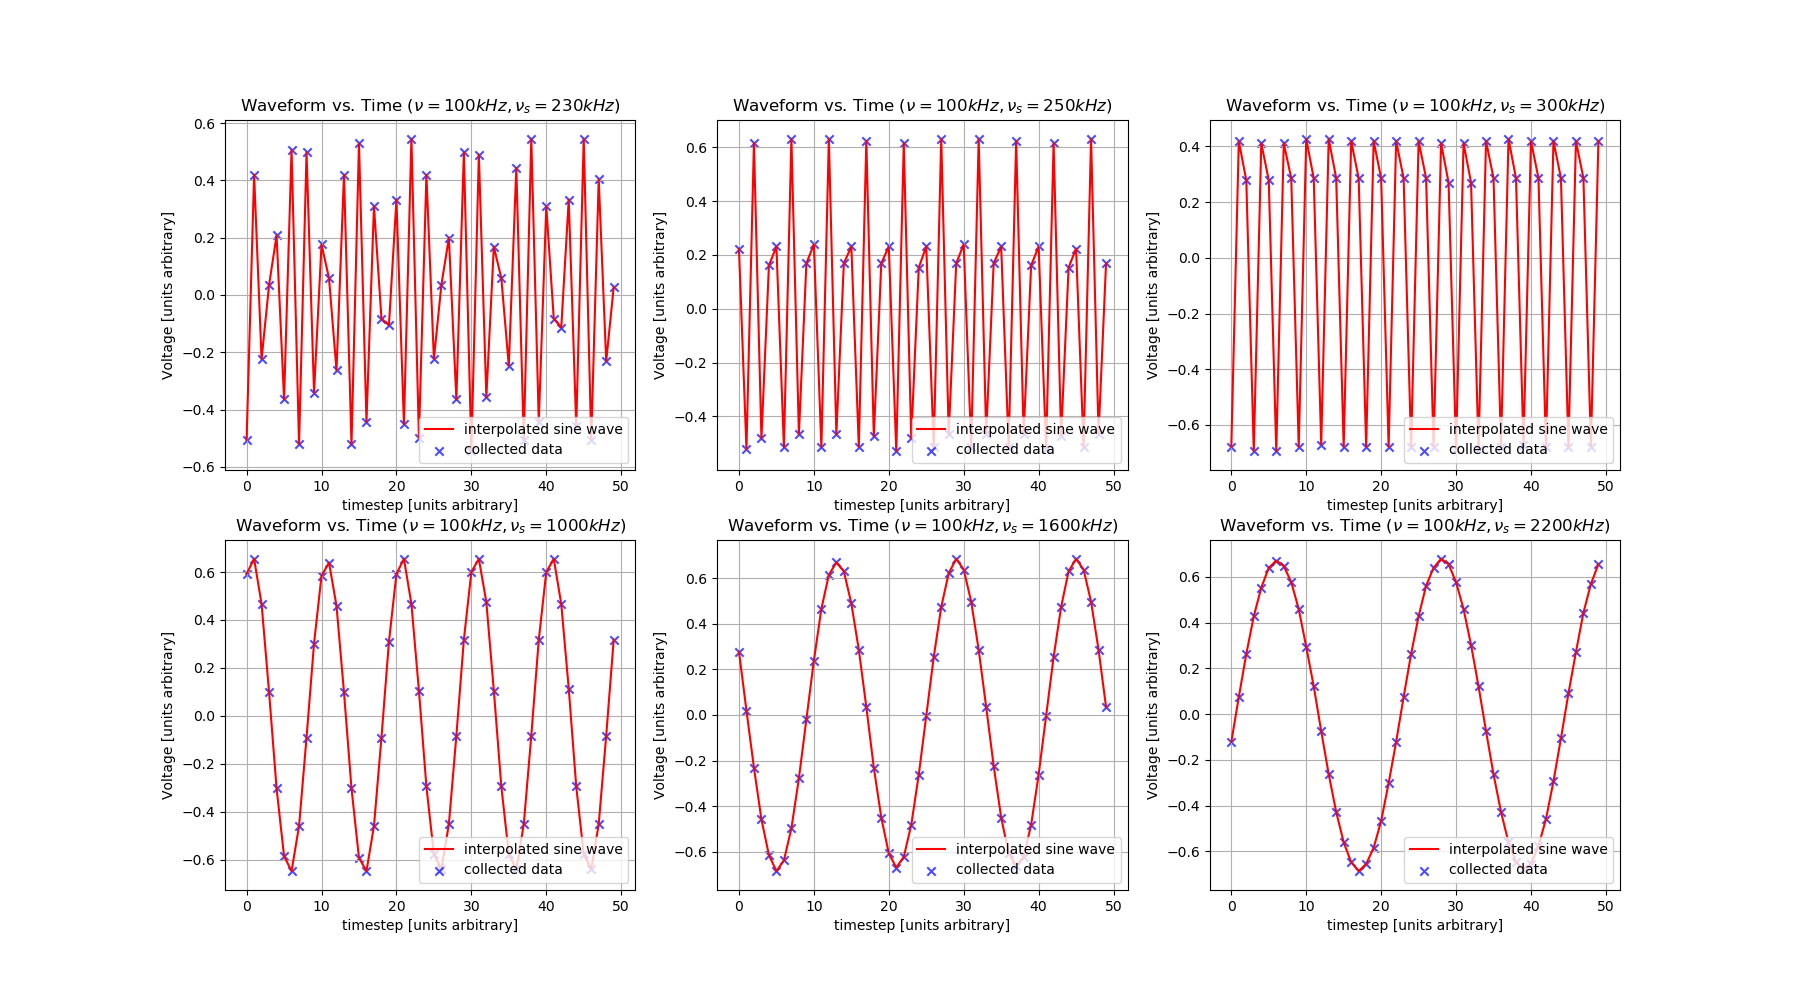

In [59]:
#Waveforms in time domain
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Power Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Waveform vs. Time $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$')
        hax.plot(times[:50], test_data.loc[:, f'{titles[k]}'][:50], color = 'r', label='interpolated sine wave')
        hax.scatter(times[:50], test_data.loc[:, f'{titles[k]}'][:50], color = 'b', marker = 'x', alpha = 0.7, label='collected data')
        #used blue-orange color scheme out of color-blindness considerations^
        #hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('timestep [units arbitrary]')
        hax.set_ylabel(r'Voltage [units arbitrary]')
        hax.legend(loc = 4, )
        hax.grid()

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Voltage Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Voltage Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].real, color = 'blue', label='real')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].imag, color = 'orange', alpha = 0.7, label='imaginary')
        #used blue-orange color scheme out of color-blindness considerations^
        #hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('voltage, [units arbitrary]')
        hax.set_ylabel(r'output [units normalized arbitrary]')
        hax.legend(loc = 4, )

<IPython.core.display.Javascript object>

TypeError: volt_spec() missing 1 required positional argument: 'sample'

In [93]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Voltage Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Voltage Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].real, color = 'blue', label='real')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].imag, color = 'orange', alpha = 0.7, label='imaginary')
        #used blue-orange color scheme out of color-blindness considerations^
        #hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('voltage, [units arbitrary]')
        hax.set_ylabel(r'output [units normalized arbitrary]')
        hax.legend(loc = 4, )

<ipython-input-93-a1f284516a8c>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')


<IPython.core.display.Javascript object>

TypeError: volt_spec() missing 1 required positional argument: 'sampling_rate'

In [65]:
#power spectra
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Power Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Power Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$')
        hax.plot(power_spec(f'{titles[k]}')[0], power_spec(f'{titles[k]}')[1].real, color = 'blue', label='real')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('voltage, [units arbitrary]')
        hax.set_ylabel(r'output [units normalized arbitrary]')

<IPython.core.display.Javascript object>

TypeError: power_spec() missing 1 required positional argument: 'sample'

# 5.4

In [67]:
df = pd.read_csv('data/data_012822')
x = np.arange(2048)

<IPython.core.display.Javascript object>


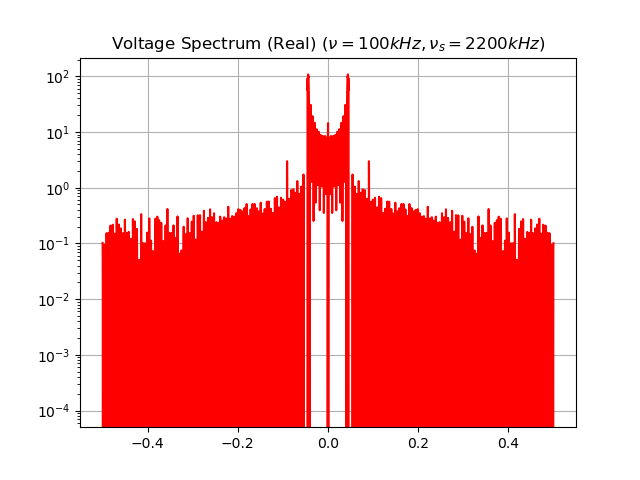

In [68]:
def volt_spec(sample, sampling_rate):
    data = df['data_%s'%(sample)]
    Nfreq=int(10*len(data))
    fourier = ugradio.dft.dft(
        data,
        f=np.linspace(-sampling_rate/2.,sampling_rate/2.,num=Nfreq,endpoint=False),
        vsamp=sampling_rate
    )
    return fourier

def power_spec(sample, sampling_rate): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample, sampling_rate)
    return volt[0], np.abs(volt[1])**2 #returns power spectrum of specified frequencies

volt_2200 = volt_spec('2200', 1)
plt.figure()
plt.title(r'Voltage Spectrum (Real) $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(volt_2200[0], volt_2200[1].real, color ='r')
plt.grid()

<IPython.core.display.Javascript object>


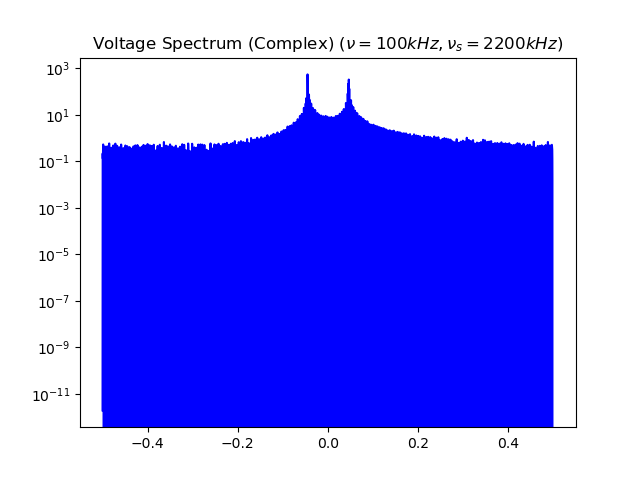

In [73]:
plt.figure()
plt.title(r'Voltage Spectrum (Complex) $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(volt_2200[0], volt_2200[1].imag, color = 'blue')

<IPython.core.display.Javascript object>


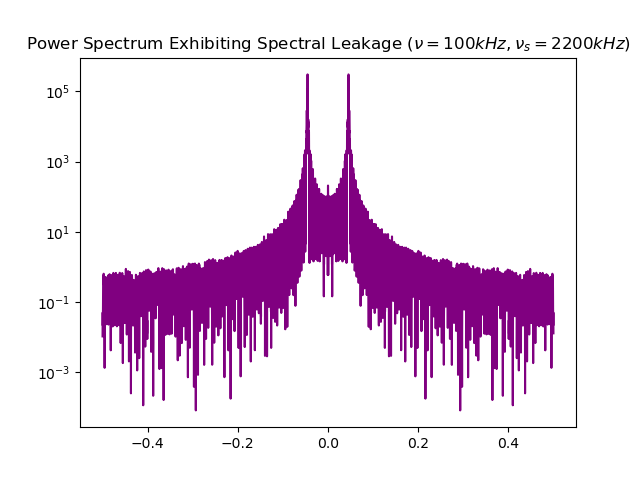

In [77]:
power_2200 = power_spec('2200', 1)
plt.figure()
plt.title(r'Power Spectrum Exhibiting Spectral Leakage $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(power_2200[0], power_2200[1].real, color = 'purple')
plt.show()

# 5.5

In [18]:
res_data = pd.read_csv('data/res_data_013122')
data_10 = res_data['data_10']
data_4 = res_data['data_4']
data_1 = res_data['data_1']
data_05 = res_data['data_05']
def power_spec(data):
    fourier = ugradio.dft.dft(data)
    power = np.abs(fourier[1])**2
    return fourier[0], power

<IPython.core.display.Javascript object>


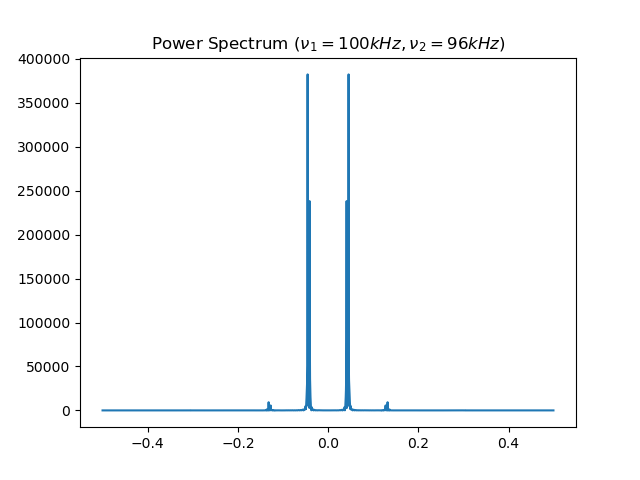

In [19]:
power_spec_4 = power_spec(data_4)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 96 kHz)$')
plt.plot(power_spec_4[0], power_spec_4[1])

<IPython.core.display.Javascript object>


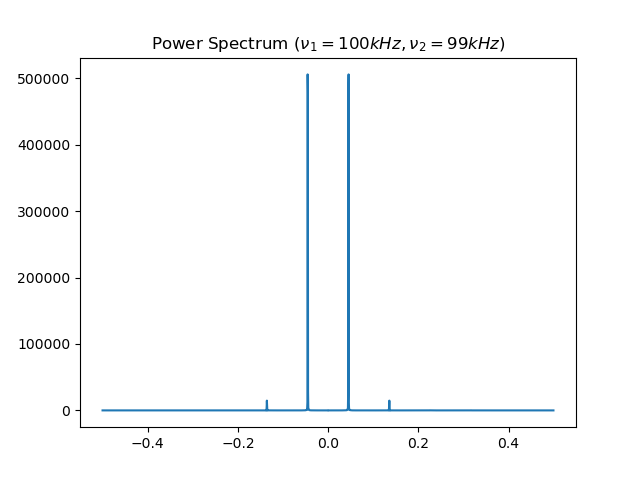

In [20]:
power_spec_1 = power_spec(data_1)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 99 kHz)$')
plt.plot(power_spec_1[0], power_spec_1[1])

# 7.1

In [21]:
def power_spec(data):
    fourier = ugradio.dft.dft(data, vsamp = 31.25e6)
    power = np.abs(fourier[1])**2
    return fourier[0], power

In [22]:
df_dsb = pd.read_csv('data/dsb_data')
dsb_plus = df_dsb['Plus']
dsb_minus = df_dsb['Minus']
dsb_power_plus = power_spec(dsb_plus)
dsb_power_minus = power_spec(dsb_minus)
dsb_volt_plus = ugradio.dft.dft(dsb_plus, vsamp = 31.25e6)

<IPython.core.display.Javascript object>


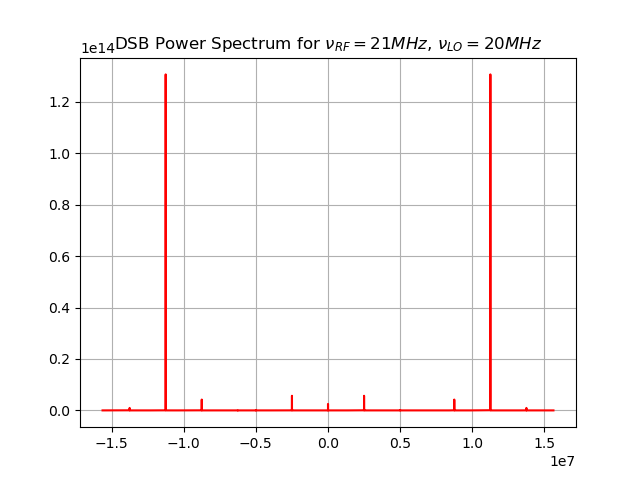

In [79]:
plt.figure()
plt.grid()
plt.plot(dsb_power_plus[0], dsb_power_plus[1], color='r')
plt.title(r'DSB Power Spectrum for $\nu_{RF} = 21 MHz$, $\nu_{LO} = 20 MHz$')
plt.show()

<IPython.core.display.Javascript object>


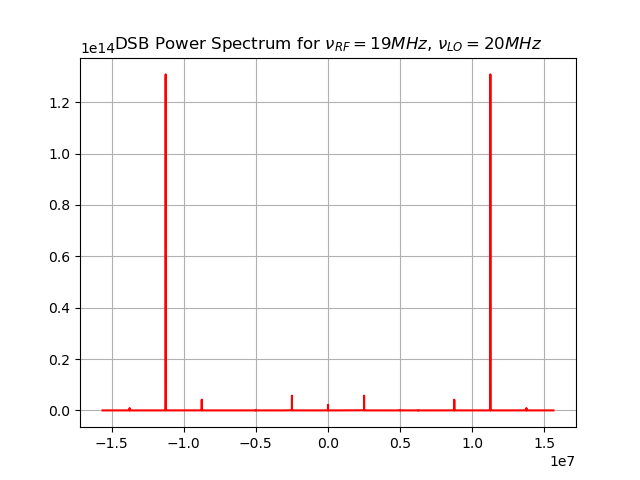

In [80]:
plt.figure()
plt.grid()
plt.plot(dsb_power_minus[0], dsb_power_minus[1], color='r')
plt.title(r'DSB Power Spectrum for $\nu_{RF} = 19 MHz$, $\nu_{LO} = 20 MHz$')
plt.show()

<IPython.core.display.Javascript object>


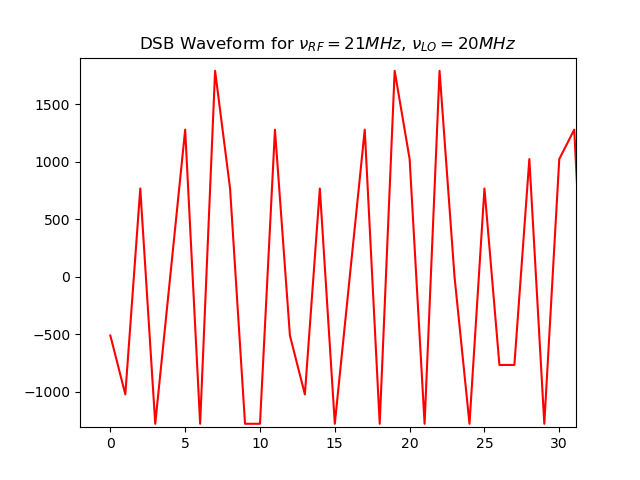

In [81]:
plt.figure()
plt.plot(dsb_plus, color = 'r')
plt.title(r'DSB Waveform for $\nu_{RF} = 21 MHz$, $\nu_{LO} = 20 MHz$')
plt.show()

<ipython-input-92-55d0688db91f>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


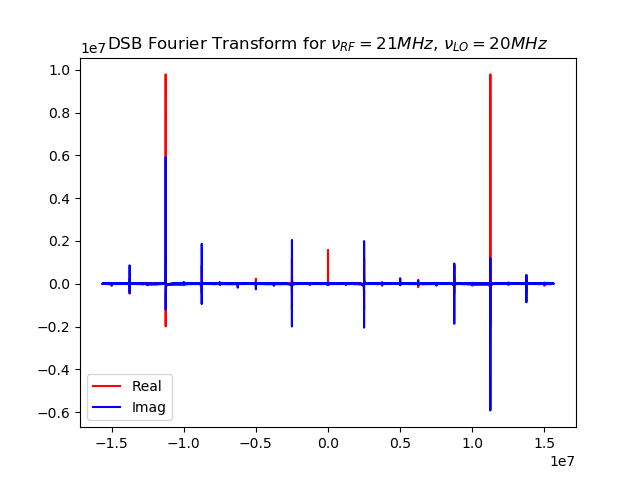

In [92]:
plt.figure()
plt.plot(dsb_volt_plus[0], dsb_volt_plus[1].real, color = 'r', label = 'Real')
plt.plot(dsb_volt_plus[0], dsb_volt_plus[1].imag, color = 'b', label = 'Imag')
plt.title(r'DSB Fourier Transform for $\nu_{RF} = 21 MHz$, $\nu_{LO} = 20 MHz$')
plt.legend()
plt.show()

# 7.2

<ipython-input-91-abdee88bd957>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


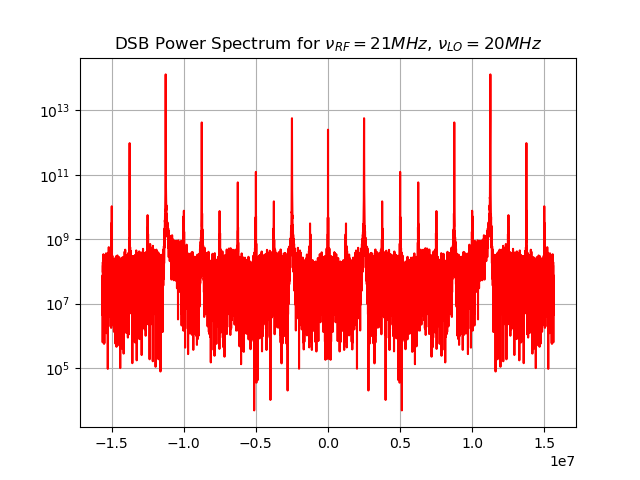

In [91]:
plt.figure()
plt.grid()
plt.semilogy(dsb_power_plus[0], dsb_power_plus[1], color='r')
plt.title(r'DSB Power Spectrum for $\nu_{RF} = 21 MHz$, $\nu_{LO} = 20 MHz$')
plt.show()

# 7.3

In [28]:
def csv2numpy(fname):
    csv_data_plus, csv_data_minus = pd.read_csv('data/'+fname)['Plus'], pd.read_csv('data/'+fname)['Minus']
    N_samples = len(csv_data_plus)
    np_data = np.empty((N_samples,2), dtype='complex')
    for i in range(N_samples):
        if not csv_data_plus[i][0] == '(':
            np_data[i, 0] = complex(csv_data_plus[i])
        else:
            np_data[i,0] = complex(csv_data_plus[i][1:-1])
        if not csv_data_minus[i][0] == '(':
            np_data[i, 1] = complex(csv_data_plus[i])
        else:
            np_data[i,1] = complex(csv_data_minus[i][1:-1])
    return np_data
ssb_0 = csv2numpy('ssb_0_data.csv')
ssb_0_plus = ssb_0[:, 0]
ssb_0_minus = ssb_0[:, 1]
ssb_0_power_plus = power_spec(ssb_0_plus)
ssb_0_power_minus = power_spec(ssb_0_minus)
ssb_90 = csv2numpy('ssb_90_data.csv')
ssb_90_plus = ssb_90[:, 0]
ssb_90_minus = ssb_90[:, 1]
ssb_90_power_plus = power_spec(ssb_90_plus)
ssb_90_power_minus = power_spec(ssb_90_minus)

<IPython.core.display.Javascript object>


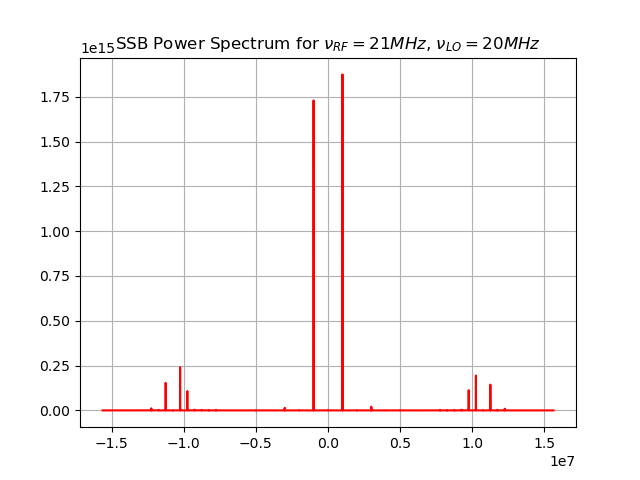

In [86]:
plt.figure()
plt.grid()
plt.plot(ssb_0_power_plus[0], ssb_0_power_plus[1], color='r')
plt.title(r'SSB Power Spectrum for $\nu_{RF} = 21 MHz$, $\nu_{LO} = 20 MHz$')
plt.show()

<IPython.core.display.Javascript object>


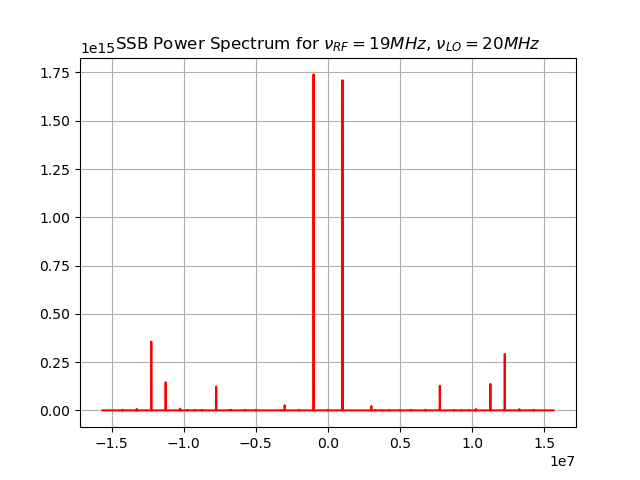

In [87]:
plt.figure()
plt.grid()
plt.plot(ssb_0_power_minus[0], ssb_0_power_minus[1], color='r')
plt.title(r'SSB Power Spectrum for $\nu_{RF} = 19 MHz$, $\nu_{LO} = 20 MHz$')
plt.show()

<IPython.core.display.Javascript object>


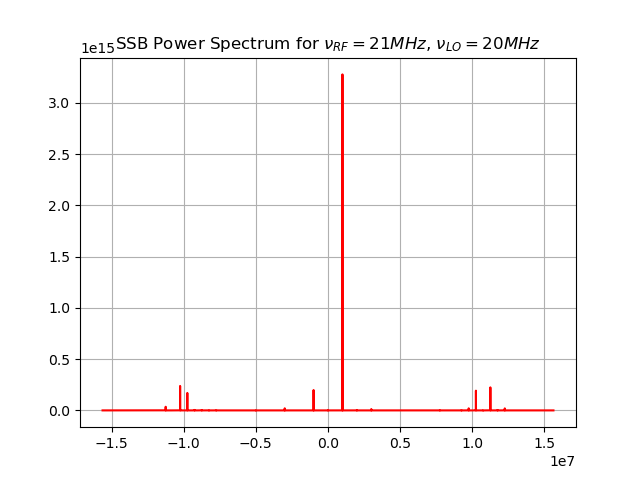

In [88]:
plt.figure()
plt.grid()
plt.plot(ssb_90_power_plus[0], ssb_90_power_plus[1], color='r')
plt.title(r'SSB Power Spectrum for $\nu_{RF} = 21 MHz$, $\nu_{LO} = 20 MHz$')
plt.show()

<ipython-input-90-ec214d8e490a>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


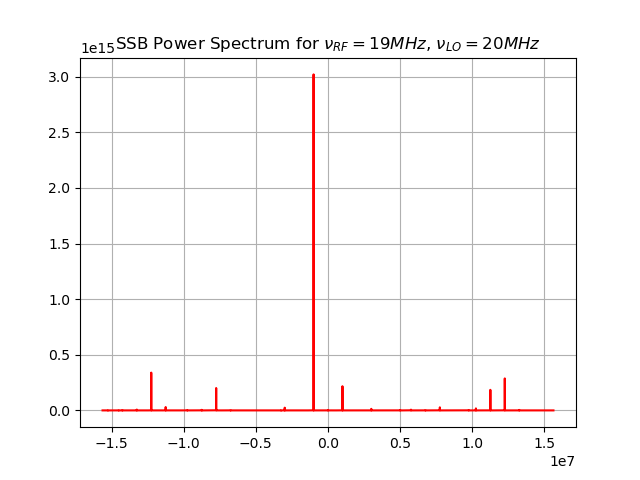

In [90]:
plt.figure()
plt.grid()
plt.plot(ssb_90_power_minus[0], ssb_90_power_minus[1], color='r')
plt.title(r'SSB Power Spectrum for $\nu_{RF} = 19 MHz$, $\nu_{LO} = 20 MHz$')
plt.show()